## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

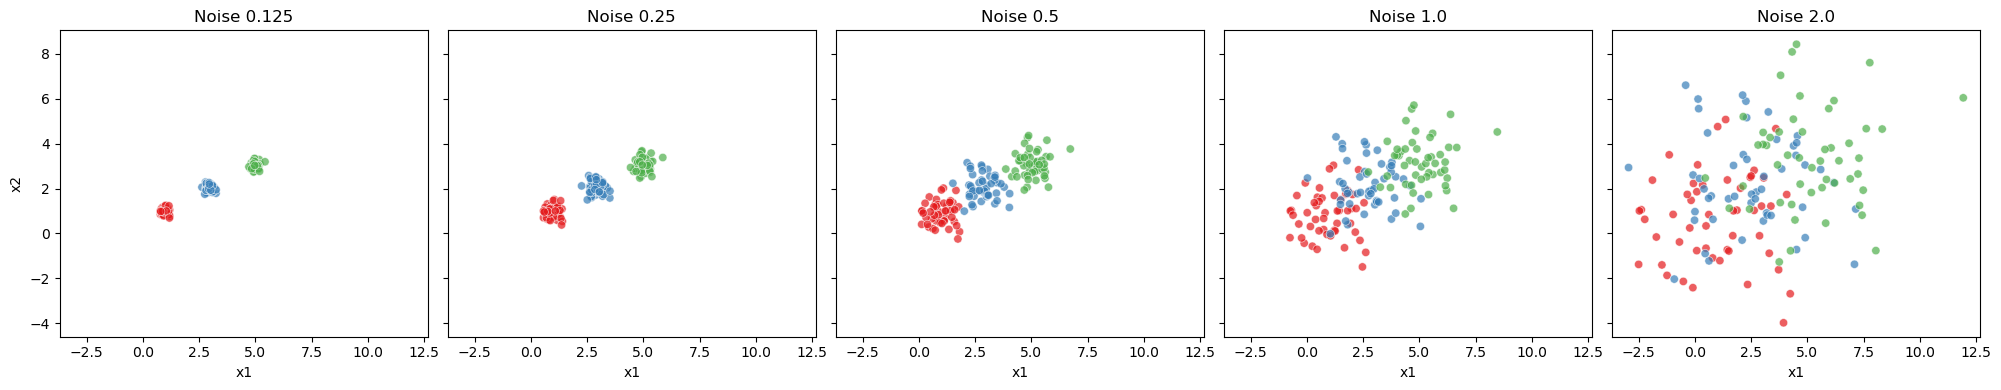

In [26]:
#datasets with different noise levels
noise_levels = [0.125, 0.25, 0.5, 1.0, 2.0]
datasets = {f"Noise {noise}": createData(noise) for noise in noise_levels}

#scatterplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharex=True, sharey=True)
for ax, (title, df) in zip(axes, datasets.items()):
    sns.scatterplot(x='x1', y='x2', hue='group', data=df, ax=ax, palette='Set1', alpha=0.7)
    ax.set_title(title)
    ax.legend().remove()

plt.tight_layout()
plt.show()

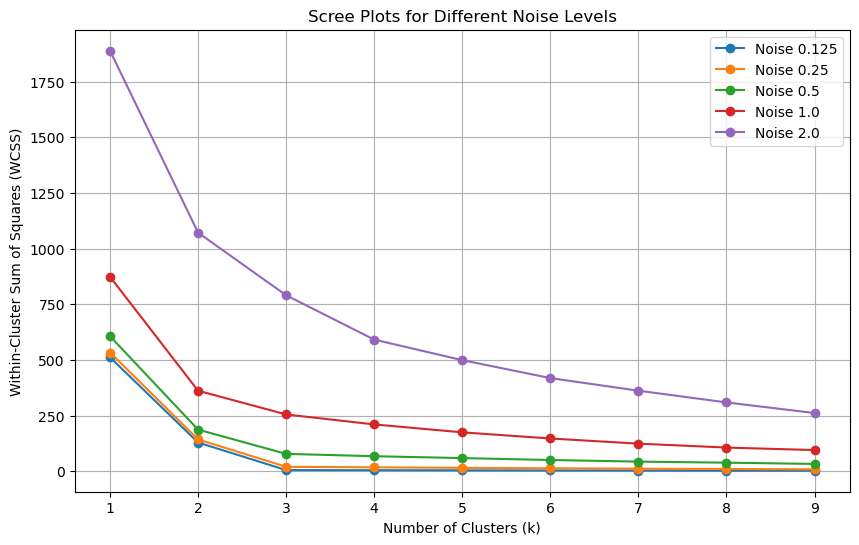

In [30]:
def createData(noise, N=50):
    np.random.seed(100)  # Set seed for consistency
    X1 = np.array([np.random.normal(1, noise, N), np.random.normal(1, noise, N)]).T
    X2 = np.array([np.random.normal(3, noise, N), np.random.normal(2, noise, N)]).T
    X3 = np.array([np.random.normal(5, noise, N), np.random.normal(3, noise, N)]).T
    df = np.vstack([X1, X2, X3])  
    return df

#generate datasets
noise_levels = [0.125, 0.25, 0.5, 1.0, 2.0]
datasets = {noise: createData(noise) for noise in noise_levels}

#WCSS
def compute_wcss(data):
    wcss = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss
wcss_results = {noise: compute_wcss(datasets[noise]) for noise in noise_levels}

#scree plots
plt.figure(figsize=(10, 6))
for noise in noise_levels:
    plt.plot(range(1, 10), wcss_results[noise], marker='o', label=f'Noise {noise}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Scree Plots for Different Noise Levels')
plt.legend()
plt.grid(True)
plt.show()

The elbow is able to help determine the best number of k by analyzing the WCSS. 

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [11]:
election_df = pd.read_csv('2022 election cycle fundraising.csv')

#clean data 
dollar_cols = ["Raised", "Spent", "Cash on Hand", "Debts"]
for col in dollar_cols:
    election_df[col] = election_df[col].replace('[\$,]', '', regex=True).astype(float)
election_df.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0
2,2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0
3,3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0
4,4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0


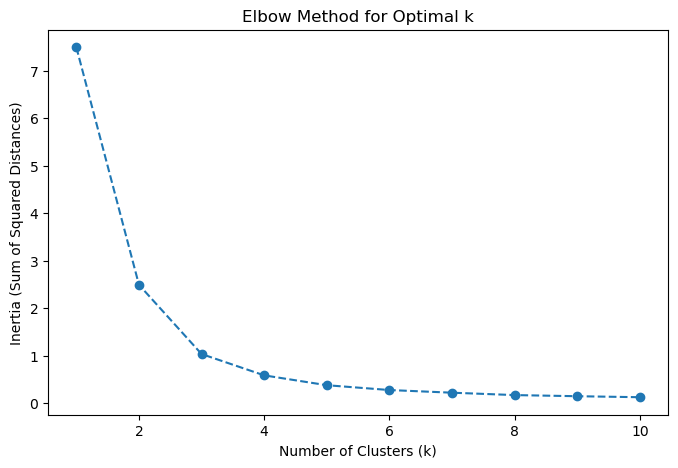

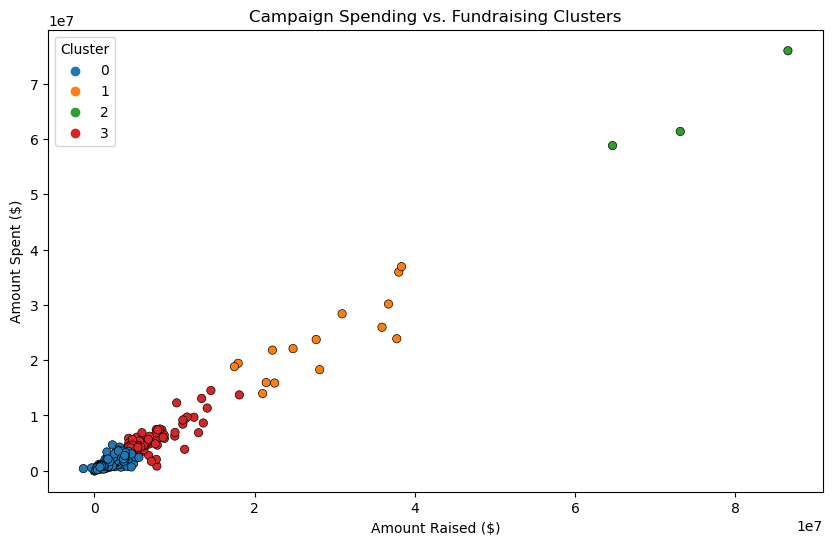

Politicians in the smallest two clusters:
                     Member       Party           State      Raised  \
2               Adam Schiff  Democratic      California  20993041.0   
87   Catherine Cortez Masto  Democratic          Nevada  37993811.0   
89            Chuck Schumer  Democratic        New York  35899966.0   
261            John Kennedy  Republican       Louisiana  28119082.0   
290            Katie Porter  Democratic      California  21441693.0   
298          Kevin McCarthy  Republican      California  24791538.0   
326           Maggie Hassan  Democratic   New Hampshire  30914830.0   
328             Marco Rubio  Republican         Florida  36709285.0   
340              Mark Kelly  Democratic         Arizona  73140886.0   
390            Nancy Pelosi  Democratic      California  22216583.0   
414               Rand Paul  Republican        Kentucky  22490627.0   
417         Raphael Warnock  Democratic         Georgia  86581469.0   
442             Ron Johnson  Republ

In [15]:
#normalize raised and spent
scaler = MinMaxScaler()
election_df[['Raised_norm', 'Spent_norm']] = scaler.fit_transform(election_df[['Raised', 'Spent']])

#optimal k
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(election_df[['Raised_norm', 'Spent_norm']])
    inertia.append(kmeans.inertia_)

#scree plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.show()

#apply k means
optimal_k = 4 
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
election_df['Cluster'] = kmeans.fit_predict(election_df[['Raised_norm', 'Spent_norm']])

#scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=election_df, x='Raised', y='Spent', hue=election_df['Cluster'], palette='tab10', edgecolor='black')
plt.xlabel('Amount Raised ($)')
plt.ylabel('Amount Spent ($)')
plt.title('Campaign Spending vs. Fundraising Clusters')
plt.legend(title='Cluster')
plt.show()

#analysis
cluster_sizes = election_df['Cluster'].value_counts()
smallest_clusters = cluster_sizes.nsmallest(2).index.tolist()
smallest_cluster_members = election_df[election_df['Cluster'].isin(smallest_clusters)][['Member', 'Party', 'State', 'Raised', 'Spent', 'Cluster']]
print("Politicians in the smallest two clusters:")
print(smallest_cluster_members)

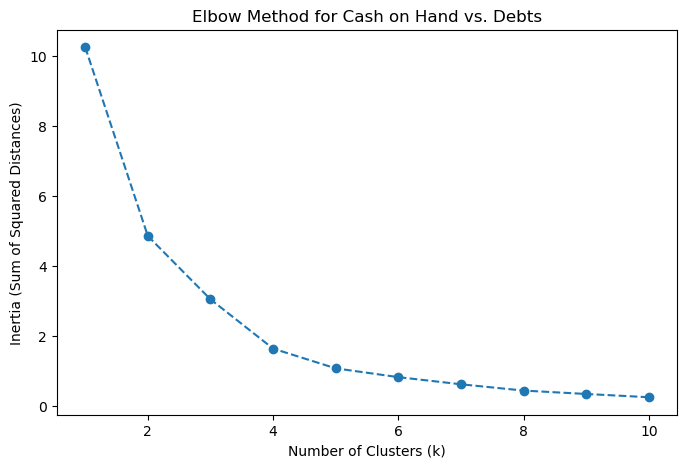

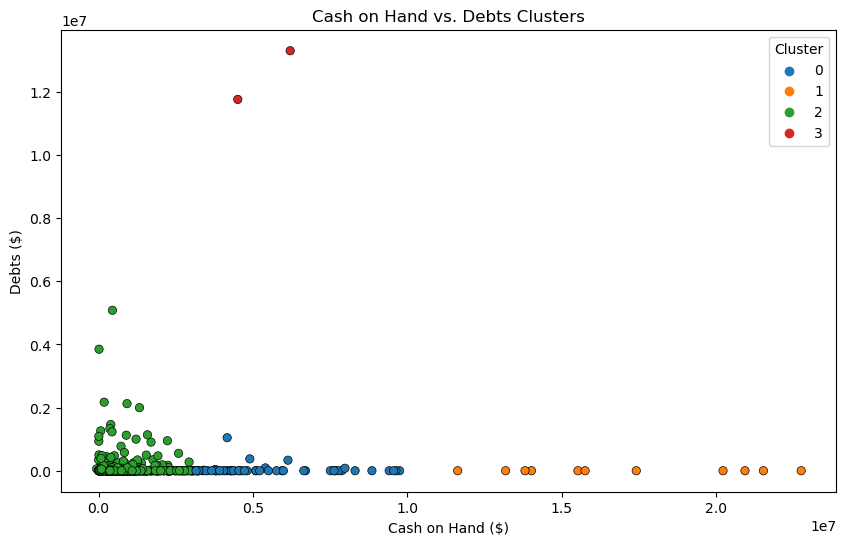

Comparison of Cluster Memberships:
               Member       Party       State      Raised       Spent  \
0  Abigail Spanberger  Democratic    Virginia   7719396.0   7449678.0   
1      Adam Kinzinger  Republican    Illinois   2192741.0   1243502.0   
2         Adam Schiff  Democratic  California  20993041.0  13957854.0   
3          Adam Smith  Democratic  Washington   1211111.0   1173466.0   
4        Adrian Smith  Republican    Nebraska   1617611.0   1664674.0   

   Cash on Hand  Debts  Cluster  Cluster_Cash_Debt  
0      851851.0    0.0        3                  2  
1     2472888.0    0.0        0                  2  
2    20942888.0    0.0        1                  1  
3      623472.0    0.0        0                  2  
4     1098579.0    0.0        0                  2  
Politicians in the smallest two clusters (Cash on Hand vs. Debts):
                  Member       Party           State  Cash on Hand  \
2            Adam Schiff  Democratic      California    20942888.0   
8

In [9]:
#normalize cash on hand and debts
election_df[['Cash_on_Hand_norm', 'Debts_norm']] = scaler.fit_transform(election_df[['Cash on Hand', 'Debts']])

#optimal k
inertia_cash_debt = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(election_df[['Cash_on_Hand_norm', 'Debts_norm']])
    inertia_cash_debt.append(kmeans.inertia_)

#scree plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_cash_debt, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Cash on Hand vs. Debts')
plt.show()

#apply k means 
optimal_k_cash_debt = 3  
kmeans_cash_debt = KMeans(n_clusters=optimal_k_cash_debt, random_state=42, n_init=10)
election_df['Cluster_Cash_Debt'] = kmeans_cash_debt.fit_predict(election_df[['Cash_on_Hand_norm', 'Debts_norm']])

#scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=election_df, x='Cash on Hand', y='Debts', hue=election_df['Cluster_Cash_Debt'], palette='tab10', edgecolor='black')
plt.xlabel('Cash on Hand ($)')
plt.ylabel('Debts ($)')
plt.title('Cash on Hand vs. Debts Clusters')
plt.legend(title='Cluster')
plt.show()

#analysis
comparison = election_df[['Member', 'Party', 'State', 'Raised', 'Spent', 'Cash on Hand', 'Debts', 'Cluster', 'Cluster_Cash_Debt']]
print("Comparison of Cluster Memberships:")
print(comparison.head())
cluster_sizes_cash_debt = election_df['Cluster_Cash_Debt'].value_counts()
smallest_clusters_cash_debt = cluster_sizes_cash_debt.nsmallest(2).index.tolist()
smallest_cluster_members_cash_debt = election_df[election_df['Cluster_Cash_Debt'].isin(smallest_clusters_cash_debt)][['Member', 'Party', 'State', 'Cash on Hand', 'Debts', 'Cluster_Cash_Debt']]
print("Politicians in the smallest two clusters (Cash on Hand vs. Debts):")
print(smallest_cluster_members_cash_debt)

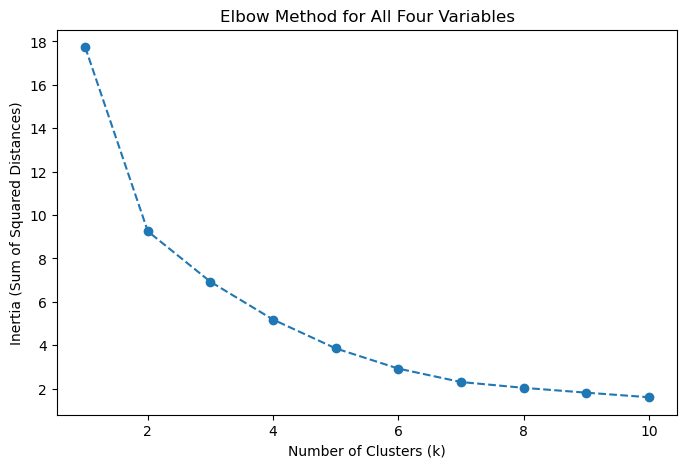

Comparison of Cluster Memberships:
               Member       Party       State      Raised       Spent  \
0  Abigail Spanberger  Democratic    Virginia   7719396.0   7449678.0   
1      Adam Kinzinger  Republican    Illinois   2192741.0   1243502.0   
2         Adam Schiff  Democratic  California  20993041.0  13957854.0   
3          Adam Smith  Democratic  Washington   1211111.0   1173466.0   
4        Adrian Smith  Republican    Nebraska   1617611.0   1664674.0   

   Cash on Hand  Debts  Cluster  Cluster_Cash_Debt  Cluster_All_Vars  
0      851851.0    0.0        3                  2                 0  
1     2472888.0    0.0        0                  2                 0  
2    20942888.0    0.0        1                  1                 1  
3      623472.0    0.0        0                  2                 0  
4     1098579.0    0.0        0                  2                 0  

Cluster Sizes for Each Approach:
   Cluster  Cluster_Cash_Debt  Cluster_All_Vars
0      442        

In [10]:
#normalize all numeric values 
features = ['Raised', 'Spent', 'Cash on Hand', 'Debts']
election_df[[f"{col}_norm" for col in features]] = scaler.fit_transform(election_df[features])

#optimal k
inertia_all_vars = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(election_df[[f"{col}_norm" for col in features]])
    inertia_all_vars.append(kmeans.inertia_)

#scree plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_all_vars, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for All Four Variables')
plt.show()

#optimal k
optimal_k_all_vars = 4
kmeans_all_vars = KMeans(n_clusters=optimal_k_all_vars, random_state=42, n_init=10)
election_df['Cluster_All_Vars'] = kmeans_all_vars.fit_predict(election_df[[f"{col}_norm" for col in features]])

#comparison
comparison_df = election_df[['Member', 'Party', 'State', 'Raised', 'Spent', 'Cash on Hand', 'Debts', 
                             'Cluster', 'Cluster_Cash_Debt', 'Cluster_All_Vars']]
print("Comparison of Cluster Memberships:")
print(comparison_df.head())
cluster_counts = election_df[['Cluster', 'Cluster_Cash_Debt', 'Cluster_All_Vars']].apply(pd.Series.value_counts)
print("\nCluster Sizes for Each Approach:")
print(cluster_counts)
smallest_clusters_all_vars = election_df['Cluster_All_Vars'].value_counts().nsmallest(2).index.tolist()
smallest_cluster_members_all_vars = election_df[election_df['Cluster_All_Vars'].isin(smallest_clusters_all_vars)]
print("\nPoliticians in the smallest clusters (All Variables):")
print(smallest_cluster_members_all_vars[['Member', 'Party', 'State', 'Raised', 'Spent', 'Cash on Hand', 'Debts', 'Cluster_All_Vars']])

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?